# GHI PREDICTION USING DIFFERENT MACHINE LEARNING MODELS

### Problem Statement

#### Create a regression model to predict GHI values based on given data like Maximum and Minimum Tempertaure, Cloud Cover, Sunshine Hours.

### 1) Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

### 2) Extracting the data as a Dataframe from an excel file


In [2]:
df = pd.read_excel("C:/Users/Ajitha/Downloads/solar_data_1.xlsx")
df = df.drop(columns=['Date']) 

In [3]:
df.head()

,H_obs,Tmax,Tmin,CC,SH
0,16.05,35.7,26.7,0.82,6.1
1,22.03,36.0,26.6,0.82,10.3
2,20.79,37.7,26.4,0.71,8.8
3,17.95,37.2,27.1,0.75,4.7
4,14.75,37.2,26.9,0.96,2.6


### 3) Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H_obs   125 non-null    float64
 1   Tmax    125 non-null    float64
 2   Tmin    125 non-null    float64
 3   CC      125 non-null    float64
 4   SH      125 non-null    float64
dtypes: float64(5)
memory usage: 5.0 KB


#### No null values in the columns

In [5]:
df.describe()

,H_obs,Tmax,Tmin,CC,SH
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,16.334656,33.657600,25.444000,0.733840,5.586400
std,5.648983,2.843818,1.546296,0.146121,3.617974
min,0.889000,25.100000,21.300000,0.340000,0.000000
25%,12.040000,32.100000,24.400000,0.620000,2.200000
50%,17.300000,34.100000,25.600000,0.730000,6.700000
75%,20.740000,35.500000,26.500000,0.850000,8.500000
max,24.890000,41.100000,28.400000,1.000000,11.100000


#### No significant outliers forund in the dataset

#### Finding the correlation

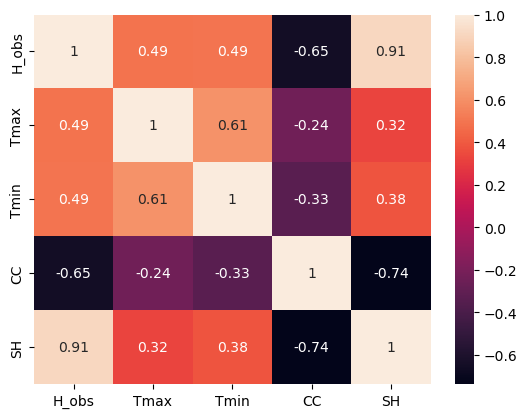

In [6]:
corr = df.corr()

plt.figure(dpi=100)
sns.heatmap(df.corr(), annot=True)
plt.show()

### 4) Assigning feature and Target Variable

In [7]:
X = df[['Tmax', 'Tmin', 'CC', 'SH']]
y = df['H_obs']

#### Standardizing the Feature Variables

In [8]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX[:5]

array([[0.6625    , 0.76056338, 0.72727273, 0.54954955],
       [0.68125   , 0.74647887, 0.72727273, 0.92792793],
       [0.7875    , 0.71830986, 0.56060606, 0.79279279],
       [0.75625   , 0.81690141, 0.62121212, 0.42342342],
       [0.75625   , 0.78873239, 0.93939394, 0.23423423]])

### 5) Splitting the data into Training and Test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.2, random_state=42)

### 6) Fitting the model: KNN

In [10]:
knn_model = KNeighborsRegressor(n_neighbors=9, weights='uniform')
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation Metrics
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Print evaluation results 
print(f"KNN Model Evaluation:\n"
      f"  R²   = {r2_knn:.4f}\n"
      f"  RMSE = {rmse_knn:.4f} MJ/m²\n")


KNN Model Evaluation:
  R²   = 0.8338
  RMSE = 2.4545 MJ/m²



### SVM Model

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Train the SVR model ===
svr_model = SVR(kernel='rbf', C=100, epsilon=0.5)
svr_model.fit(X_train_scaled, y_train)

# === Predict on test data ===
y_pred_svm = svr_model.predict(X_test_scaled)

# === Evaluation metrics ===
r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

# === Print evaluation results ===
print(f"\nSVM Model Evaluation:\n"
      f"  R²   = {r2_svm:.4f}\n"
      f"  RMSE = {rmse_svm:.4f} MJ/m²\n")


SVM Model Evaluation:
  R²   = 0.8699
  RMSE = 2.1713 MJ/m²



### Random Forest Model

In [12]:
model = RandomForestRegressor(n_estimators= 245, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred_rfr = model.predict(X_test)

# === Evaluation metrics ===
r2_rfr = r2_score(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))

# === Print evaluation results ===
print(f"Random forest model Evaluvation:\n"
      f"  R²   = {r2_rfr:.4f}\n"
      f"  RMSE = {rmse_rfr:.4f} MJ/m²\n")

Random forest model Evaluvation:
  R²   = 0.8847
  RMSE = 2.0443 MJ/m²



### 7) Plotting the Scatter Plot for each model 

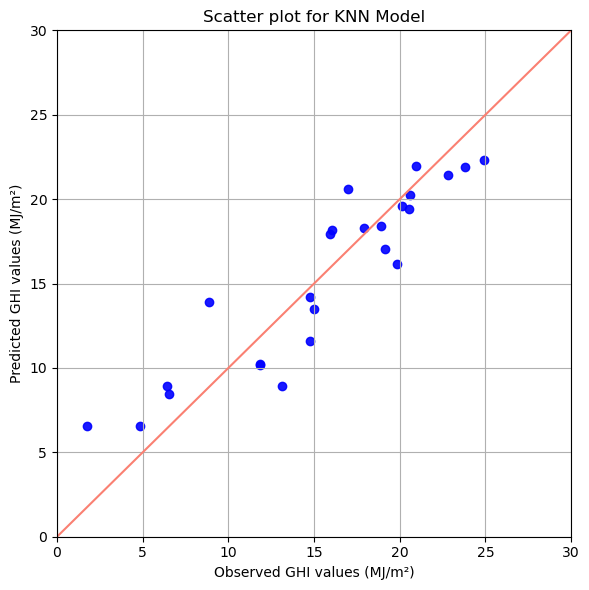

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.9)
plt.xlabel('Observed GHI values (MJ/m²)')
plt.ylabel('Predicted GHI values (MJ/m²)')
plt.title('Scatter plot for KNN Model')

# Set x and y axis limits (e.g., from 0 to 30)
plt.xlim(0, 30)
plt.ylim(0, 30)

# Optionally add reference line
plt.plot([0, 30], [0, 30], color='salmon', linestyle='-')

plt.grid(True)
plt.tight_layout()
plt.show()


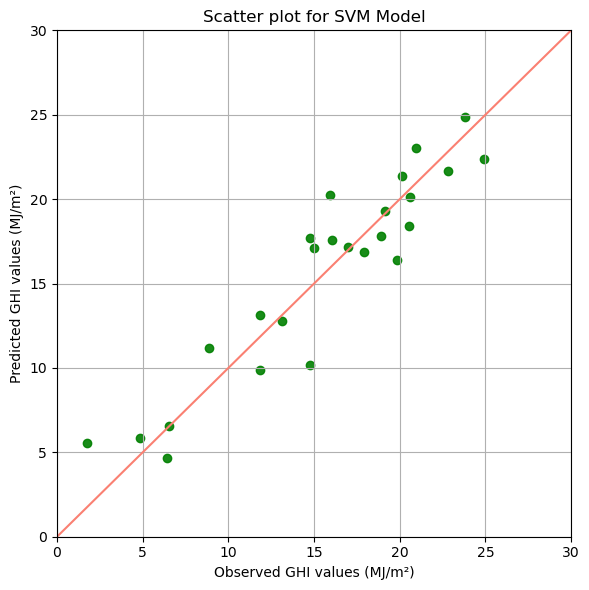

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_svm, color='green', alpha=0.9)
plt.xlabel('Observed GHI values (MJ/m²)')
plt.ylabel('Predicted GHI values (MJ/m²)')
plt.title('Scatter plot for SVM Model')

# Set x and y axis limits 
plt.xlim(0, 30)
plt.ylim(0, 30)

# add reference line
plt.plot([0, 30], [0, 30], color='salmon', linestyle='-')

plt.grid(True)
plt.tight_layout()
plt.show()

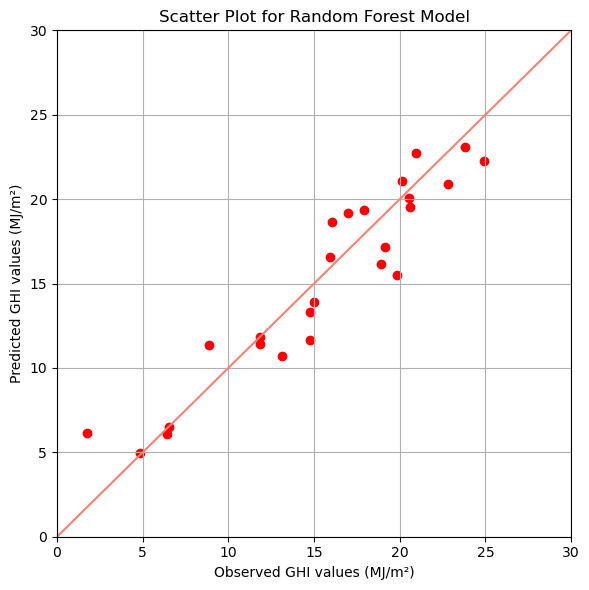

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rfr, color='red', alpha=1.0)
plt.xlabel('Observed GHI values (MJ/m²)')
plt.ylabel('Predicted GHI values (MJ/m²)')
plt.title('Scatter Plot for Random Forest Model')

# Set x and y axis limits 
plt.xlim(0, 30)
plt.ylim(0, 30)

# add reference line
plt.plot([0, 30], [0, 30], color='salmon', linestyle='-')

plt.grid(True)
plt.tight_layout()
plt.show()

### 8) Plotting the residual plots

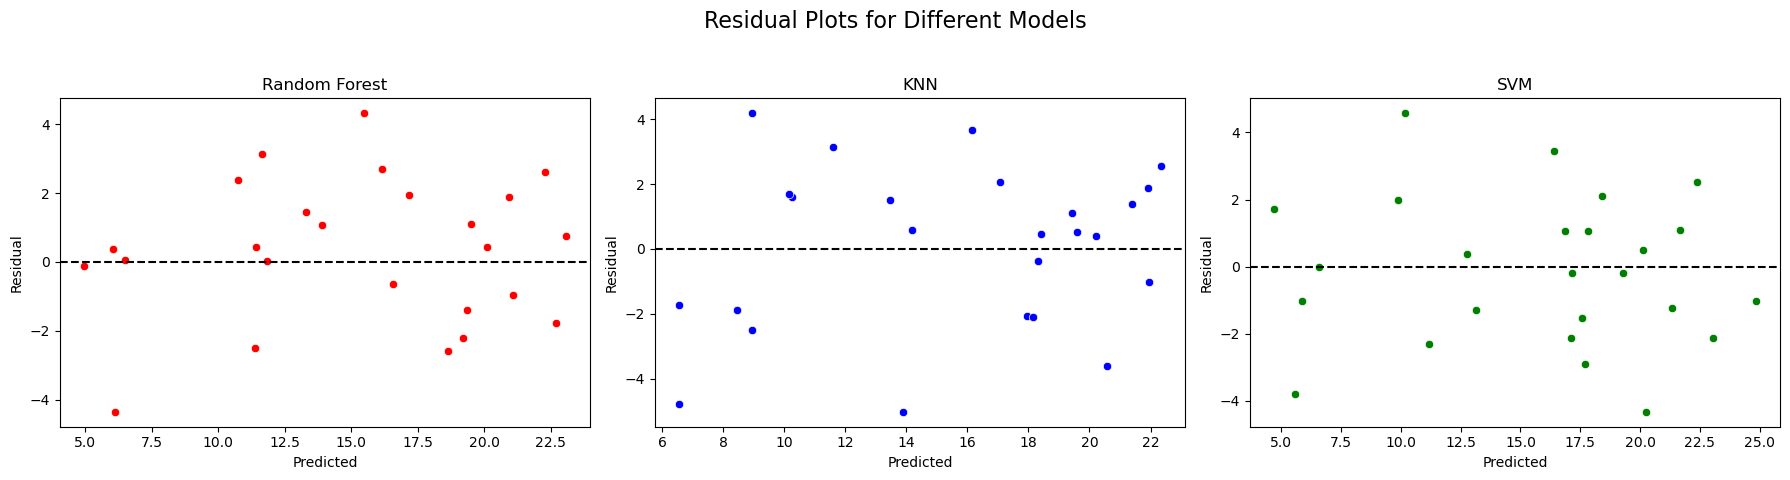

In [16]:
# Compute residuals
residuals_rfr = y_test - y_pred_rfr
residuals_knn = y_test - y_pred_knn
residuals_svm = y_test - y_pred_svm

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Residual Plots for Different Models', fontsize=16)

# Random Forest
sns.scatterplot(x=y_pred_rfr, y=residuals_rfr, ax=axes[0], color='red')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Residual')

# KNN
sns.scatterplot(x=y_pred_knn, y=residuals_knn, ax=axes[1], color='blue')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title('KNN')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Residual')

# SVR
sns.scatterplot(x=y_pred_svm, y=residuals_svm, ax=axes[2], color='green')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_title('SVM')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Residual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 9) Comparing the metrics of each model

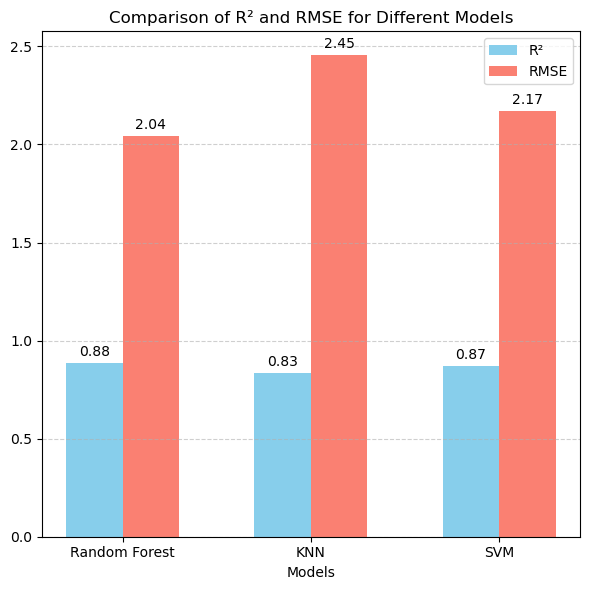

In [17]:
# Model names
models = ['Random Forest', 'KNN', 'SVM']

# Performance metrics
r2_scores = [0.8847, 0.8338, 0.8699]
rmse_values = [2.0443,2.4540,2.1713]

# Bar width and positions
x = np.arange(len(models))
width = 0.3  

# Plotting
plt.figure(figsize=(6,6))
bar1 = plt.bar(x - width/2, r2_scores, width, label='R²', color='skyblue')
bar2 = plt.bar(x + width/2, rmse_values, width, label='RMSE', color='salmon')

# Labels and Title
plt.xlabel('Models')
plt.title('Comparison of R² and RMSE for Different Models')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display values on top of bars
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3), 
                 textcoords="offset points", 
                 ha='center', va='bottom')

plt.show()

### Result : Thus Random Forest model gives the best prediction.